In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score 
import pandas as pd


In [2]:
cancer = load_breast_cancer()
df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)
df["target"] = cancer.target

In [3]:
df.shape  # gözlem ve feature sayısı

(569, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.columns  # feature(sütun) isimleri

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [6]:
df = df.rename(columns={
    'mean radius': 'ortalama_yaricap',
    'mean texture': 'ortalama_doku',
    'mean perimeter': 'ortalama_cevre',
    'mean area': 'ortalama_alan',
    'mean smoothness': 'ortalama_puruzsuzluk',
    'mean compactness': 'ortalama_kompaktlik',
    'mean concavity': 'ortalama_icbukeylik',
    'mean concave points': 'ortalama_icbukey_noktalar',
    'mean symmetry': 'ortalama_simetri',
    'mean fractal dimension': 'ortalama_fraktal_boyut',

    'radius error': 'yaricap_hatasi',
    'texture error': 'doku_hatasi',
    'perimeter error': 'cevre_hatasi',
    'area error': 'alan_hatasi',
    'smoothness error': 'puruzsuzluk_hatasi',
    'compactness error': 'kompaktlik_hatasi',
    'concavity error': 'icbukeylik_hatasi',
    'concave points error': 'icbukey_noktalar_hatasi',
    'symmetry error': 'simetri_hatasi',
    'fractal dimension error': 'fraktal_boyut_hatasi',

    'worst radius': 'en_kotu_yaricap',
    'worst texture': 'en_kotu_doku',
    'worst perimeter': 'en_kotu_cevre',
    'worst area': 'en_kotu_alan',
    'worst smoothness': 'en_kotu_puruzsuzluk',
    'worst compactness': 'en_kotu_kompaktlik',
    'worst concavity': 'en_kotu_icbukeylik',
    'worst concave points': 'en_kotu_icbukey_noktalar',
    'worst symmetry': 'en_kotu_simetri',
    'worst fractal dimension': 'en_kotu_fraktal_boyut',

    'target': 'tani'
})


In [7]:
df.describe()  # özet istatistikleri hesapla

,ortalama_yaricap,ortalama_doku,ortalama_cevre,ortalama_alan,ortalama_puruzsuzluk,ortalama_kompaktlik,ortalama_icbukeylik,ortalama_icbukey_noktalar,ortalama_simetri,ortalama_fraktal_boyut,...,en_kotu_doku,en_kotu_cevre,en_kotu_alan,en_kotu_puruzsuzluk,en_kotu_kompaktlik,en_kotu_icbukeylik,en_kotu_icbukey_noktalar,en_kotu_simetri,en_kotu_fraktal_boyut,tani
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [8]:
df.dtypes 

ortalama_yaricap             float64
ortalama_doku                float64
ortalama_cevre               float64
ortalama_alan                float64
ortalama_puruzsuzluk         float64
ortalama_kompaktlik          float64
ortalama_icbukeylik          float64
ortalama_icbukey_noktalar    float64
ortalama_simetri             float64
ortalama_fraktal_boyut       float64
yaricap_hatasi               float64
doku_hatasi                  float64
cevre_hatasi                 float64
alan_hatasi                  float64
puruzsuzluk_hatasi           float64
kompaktlik_hatasi            float64
icbukeylik_hatasi            float64
icbukey_noktalar_hatasi      float64
simetri_hatasi               float64
fraktal_boyut_hatasi         float64
en_kotu_yaricap              float64
en_kotu_doku                 float64
en_kotu_cevre                float64
en_kotu_alan                 float64
en_kotu_puruzsuzluk          float64
en_kotu_kompaktlik           float64
en_kotu_icbukeylik           float64
e

In [9]:
df.isnull().sum()   # her feature(sütun) için eksik değer sayısı 

ortalama_yaricap             0
ortalama_doku                0
ortalama_cevre               0
ortalama_alan                0
ortalama_puruzsuzluk         0
ortalama_kompaktlik          0
ortalama_icbukeylik          0
ortalama_icbukey_noktalar    0
ortalama_simetri             0
ortalama_fraktal_boyut       0
yaricap_hatasi               0
doku_hatasi                  0
cevre_hatasi                 0
alan_hatasi                  0
puruzsuzluk_hatasi           0
kompaktlik_hatasi            0
icbukeylik_hatasi            0
icbukey_noktalar_hatasi      0
simetri_hatasi               0
fraktal_boyut_hatasi         0
en_kotu_yaricap              0
en_kotu_doku                 0
en_kotu_cevre                0
en_kotu_alan                 0
en_kotu_puruzsuzluk          0
en_kotu_kompaktlik           0
en_kotu_icbukeylik           0
en_kotu_icbukey_noktalar     0
en_kotu_simetri              0
en_kotu_fraktal_boyut        0
tani                         0
dtype: int64

In [10]:
df.isnull().mean()   # yüzdesel eksik değer oranını

ortalama_yaricap             0.0
ortalama_doku                0.0
ortalama_cevre               0.0
ortalama_alan                0.0
ortalama_puruzsuzluk         0.0
ortalama_kompaktlik          0.0
ortalama_icbukeylik          0.0
ortalama_icbukey_noktalar    0.0
ortalama_simetri             0.0
ortalama_fraktal_boyut       0.0
yaricap_hatasi               0.0
doku_hatasi                  0.0
cevre_hatasi                 0.0
alan_hatasi                  0.0
puruzsuzluk_hatasi           0.0
kompaktlik_hatasi            0.0
icbukeylik_hatasi            0.0
icbukey_noktalar_hatasi      0.0
simetri_hatasi               0.0
fraktal_boyut_hatasi         0.0
en_kotu_yaricap              0.0
en_kotu_doku                 0.0
en_kotu_cevre                0.0
en_kotu_alan                 0.0
en_kotu_puruzsuzluk          0.0
en_kotu_kompaktlik           0.0
en_kotu_icbukeylik           0.0
en_kotu_icbukey_noktalar     0.0
en_kotu_simetri              0.0
en_kotu_fraktal_boyut        0.0
tani      

In [11]:
df[df.isnull().any(axis=1)]   # eksik değeri olan sütunları görüntüle

,ortalama_yaricap,ortalama_doku,ortalama_cevre,ortalama_alan,ortalama_puruzsuzluk,ortalama_kompaktlik,ortalama_icbukeylik,ortalama_icbukey_noktalar,ortalama_simetri,ortalama_fraktal_boyut,...,en_kotu_doku,en_kotu_cevre,en_kotu_alan,en_kotu_puruzsuzluk,en_kotu_kompaktlik,en_kotu_icbukeylik,en_kotu_icbukey_noktalar,en_kotu_simetri,en_kotu_fraktal_boyut,tani


In [12]:
df['tani'].unique()  # sütundaki tekrarlanmayan tüm farklı değerleri listele

array([0, 1])

In [13]:
df['tani'].nunique()   # sütunda kaç farklı (benzersiz) değer olduğunu hesapla

2

In [14]:
df['tani'].value_counts()  # sütundaki her benzersiz değerin kaç kere tekrar ettiğini(sıklığını) hesapla

tani
1    357
0    212
Name: count, dtype: int64

##  Tümör Sınıflandırma Dağılımı (Kötü Huylu ve İyi Huylu

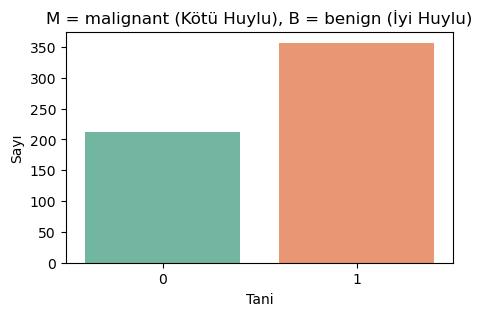

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))
sns.countplot(x='tani', data=df, palette='Set2')
plt.title("M = malignant (Kötü Huylu), B = benign (İyi Huylu)")
plt.xlabel('Tani')
plt.ylabel('Sayı')
plt.show()


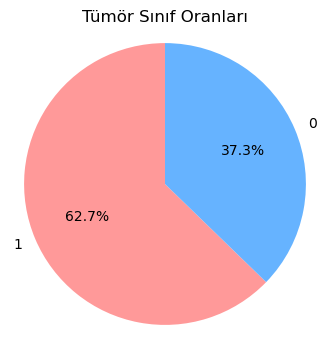

In [33]:
import matplotlib.pyplot as plt

counts = df['tani'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Tümör Sınıf Oranları')
plt.axis('equal')  
plt.show()

## Pozitif Korelasyonlar

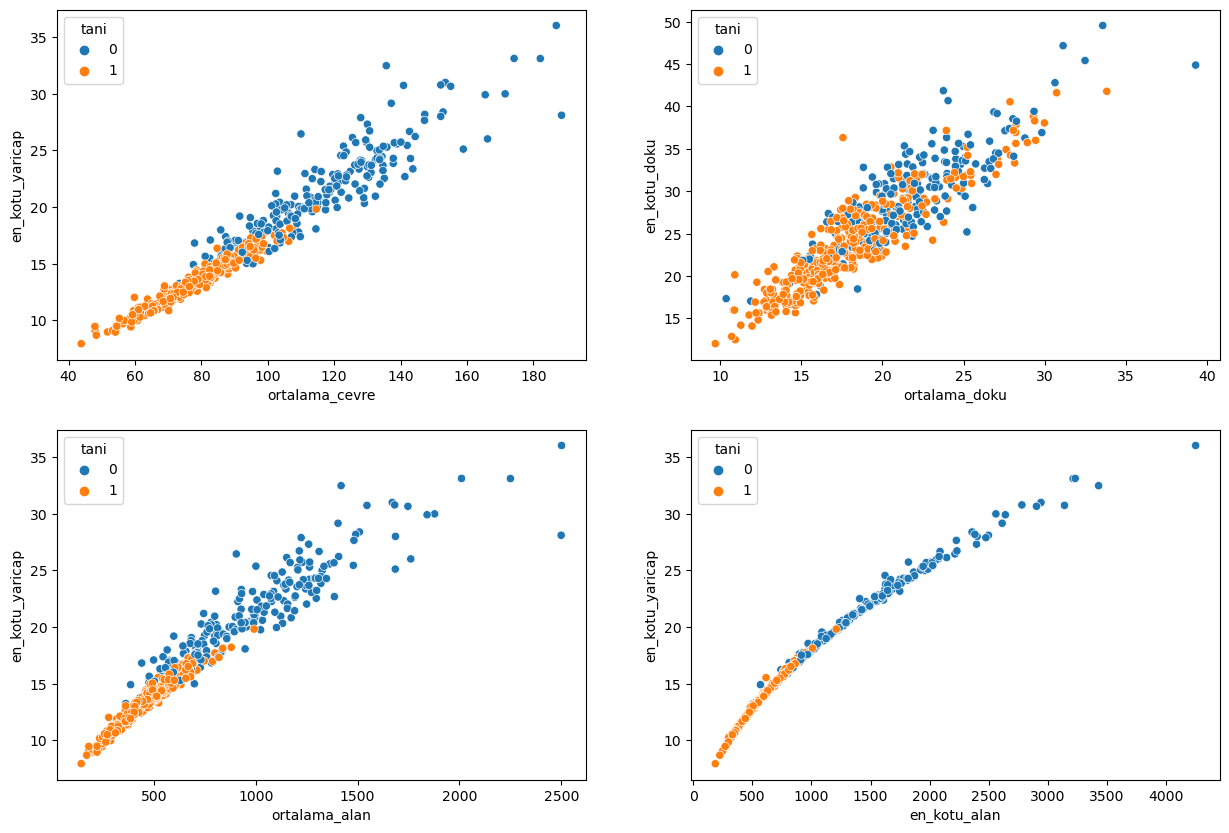

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns 

fig, ax = plt.subplots(2, 2, figsize=(15, 10))

sns.scatterplot(x='ortalama_cevre', y='en_kotu_yaricap', data=df, hue='tani', ax=ax[0][0])
sns.scatterplot(x='ortalama_alan', y='en_kotu_yaricap', data=df, hue='tani', ax=ax[1][0])
sns.scatterplot(x='ortalama_doku', y='en_kotu_doku', data=df, hue='tani', ax=ax[0][1])
sns.scatterplot(x='en_kotu_alan', y='en_kotu_yaricap', data=df, hue='tani', ax=ax[1][1])

plt.show()


## Negatif Korelasyonlar

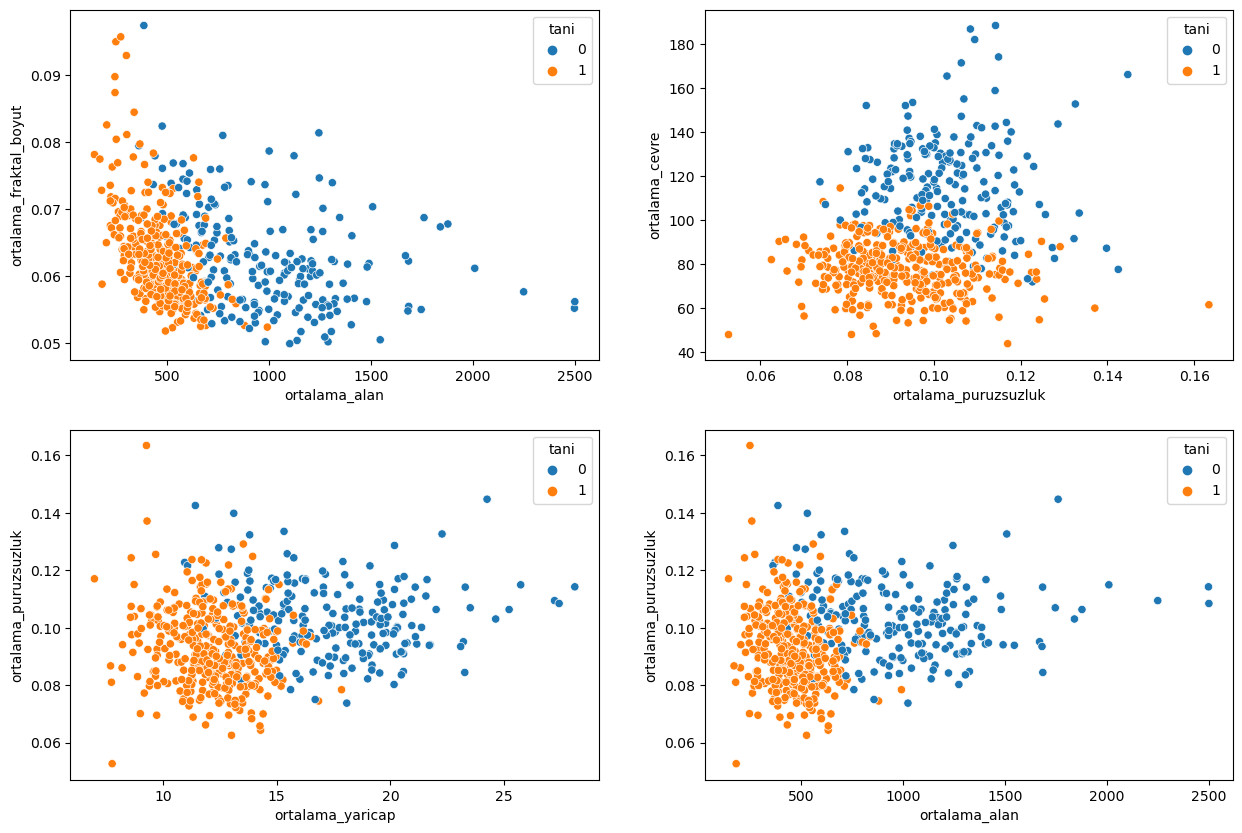

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

sns.scatterplot(x='ortalama_alan', y='ortalama_fraktal_boyut', data=df, hue='tani', ax=ax[0][0])
sns.scatterplot(x='ortalama_yaricap', y='ortalama_puruzsuzluk', data=df, hue='tani', ax=ax[1][0])
sns.scatterplot(x='ortalama_puruzsuzluk', y='ortalama_cevre', data=df, hue='tani', ax=ax[0][1])
sns.scatterplot(x='ortalama_alan', y='ortalama_puruzsuzluk', data=df, hue='tani', ax=ax[1][1])

plt.show()


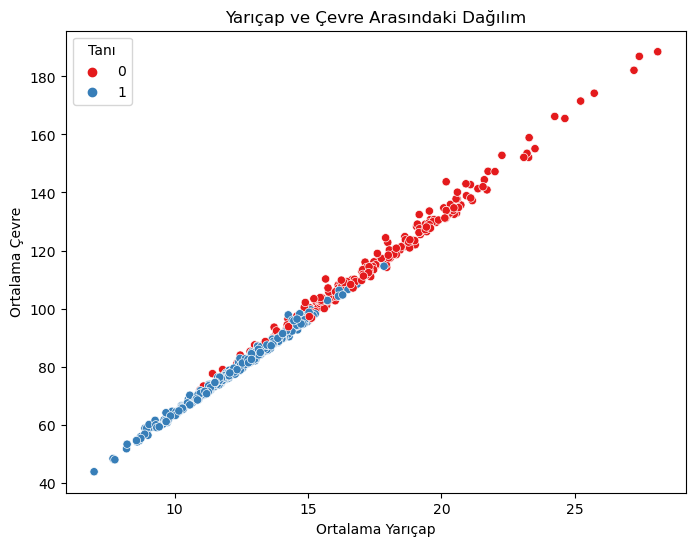

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x='ortalama_yaricap', y='ortalama_cevre', hue='tani', data=df, palette='Set1')
plt.title('Yarıçap ve Çevre Arasındaki Dağılım')
plt.xlabel('Ortalama Yarıçap')
plt.ylabel('Ortalama Çevre')
plt.legend(title='Tanı')
plt.show()


## Özellikler Arasındaki Korelasyon

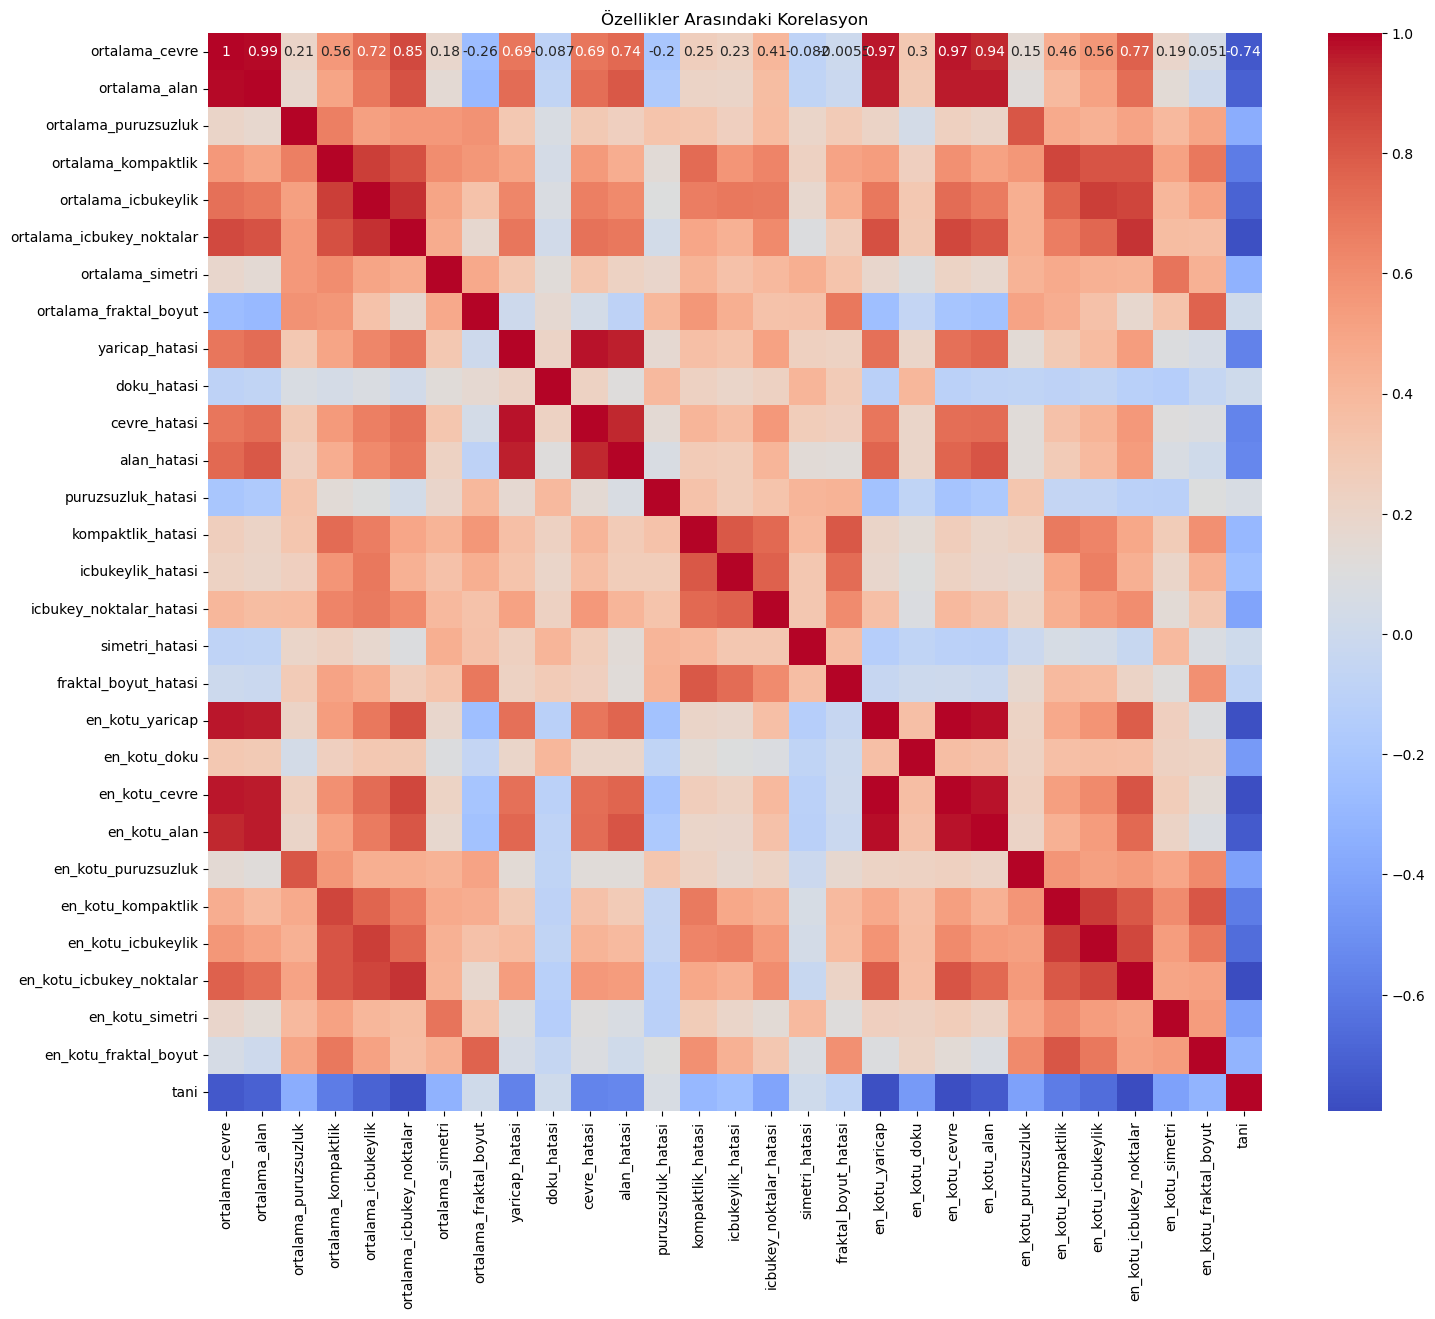

In [20]:
selected_features = df.iloc[:,2:]
correlation_matrix = selected_features.corr()
plt.figure(figsize=(17, 14), dpi=100)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Özellikler Arasındaki Korelasyon')
plt.show()

## Kategorik Verilerin Binary Dönüşümü

In [21]:
from sklearn.preprocessing import LabelEncoder

column_to_encode = 'tani'
label_encoder = LabelEncoder()

df[column_to_encode] = label_encoder.fit_transform(df[column_to_encode])
df.to_csv('encoded_data.csv', index=False)
df.head(5)

,ortalama_yaricap,ortalama_doku,ortalama_cevre,ortalama_alan,ortalama_puruzsuzluk,ortalama_kompaktlik,ortalama_icbukeylik,ortalama_icbukey_noktalar,ortalama_simetri,ortalama_fraktal_boyut,...,en_kotu_doku,en_kotu_cevre,en_kotu_alan,en_kotu_puruzsuzluk,en_kotu_kompaktlik,en_kotu_icbukeylik,en_kotu_icbukey_noktalar,en_kotu_simetri,en_kotu_fraktal_boyut,tani
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Verileri Ölçeklendirme

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
data= pd.DataFrame(scaled_data,columns = df.columns)
data

,ortalama_yaricap,ortalama_doku,ortalama_cevre,ortalama_alan,ortalama_puruzsuzluk,ortalama_kompaktlik,ortalama_icbukeylik,ortalama_icbukey_noktalar,ortalama_simetri,ortalama_fraktal_boyut,...,en_kotu_doku,en_kotu_cevre,en_kotu_alan,en_kotu_puruzsuzluk,en_kotu_kompaktlik,en_kotu_icbukeylik,en_kotu_icbukey_noktalar,en_kotu_simetri,en_kotu_fraktal_boyut,tani
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,0.0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,0.0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,0.0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,0.0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667,0.0
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315,0.0
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909,0.0
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315,0.0


## Lojistik Regresyon ile Kanser Sınıflandırması ve Model Performans Değerlendirmesi

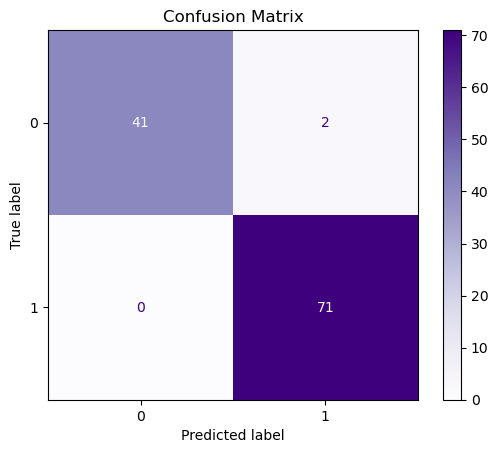

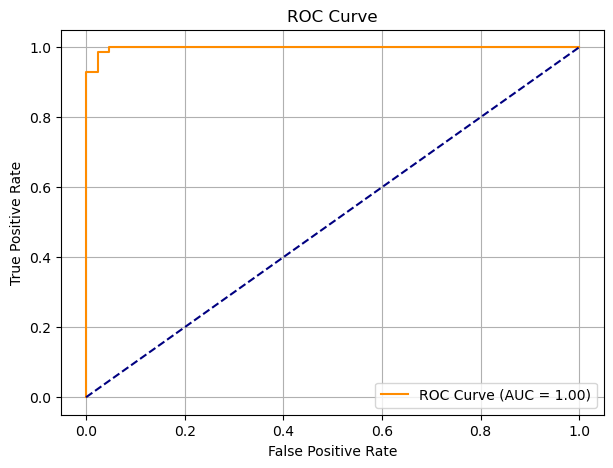

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# özellikler (X) ve hedef değişken (y) ---
X = df.drop('tani', axis=1)
y = df['tani']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# eğitim ve test verilerine ayır
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# modeli oluştur ve eğit
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

# tahmin yap
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Purples')
plt.title("Confusion Matrix")
plt.show()

# ROC Eğrisi
y_prob = model.predict_proba(X_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Rastgele tahmin çizgisi
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
